# Exploration_1
## 1.1 프로젝트 설정
### 1.11 라이브러리 및 모듈 임포트

In [1]:
import tensorflow as tf, tensorflow_datasets as tfds, keras
import models_base, utils

print(tf.__version__)
print(tfds.__version__)


2025-01-24 17:22:04.545517: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 17:22:04.554401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737706924.565575  166591 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737706924.568626  166591 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 17:22:04.579829: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0
4.9.7


### 1.12 데이터셋 다운로드 및 확인

I0000 00:00:1737706926.705119  166591 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-01-24 17:22:07.142257: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/technocracy90/keras/exp_1/data/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


2025-01-24 17:22:07.396859: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-24 17:22:07.402697: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


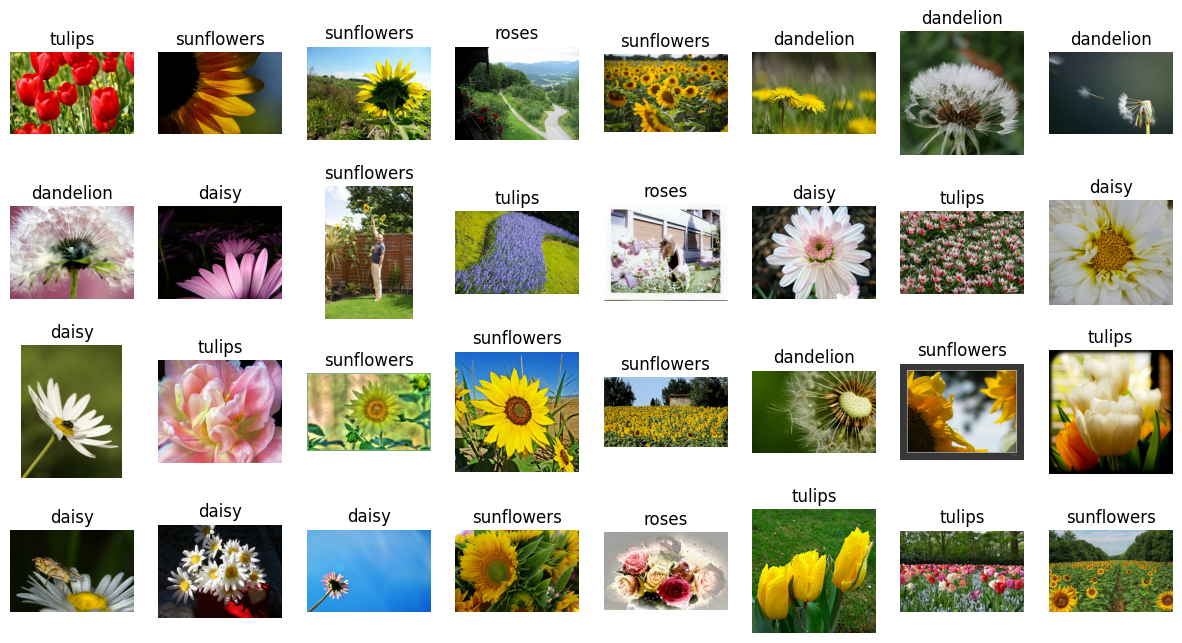

In [2]:
# Load the dataset
(raw_train, raw_validation, raw_test), dataset_info = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='~/keras/exp_1/data/',
    download=True,
    with_info=True,
    as_supervised=True,
)

# Print the dataset info
print(dataset_info)

utils.example_display(dataset_info, raw_train, num_examples=32, is_raw = True)

### 1.13 데이터셋 전처리 및 적재

2025-01-24 17:22:08.713553: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-24 17:22:08.721518: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


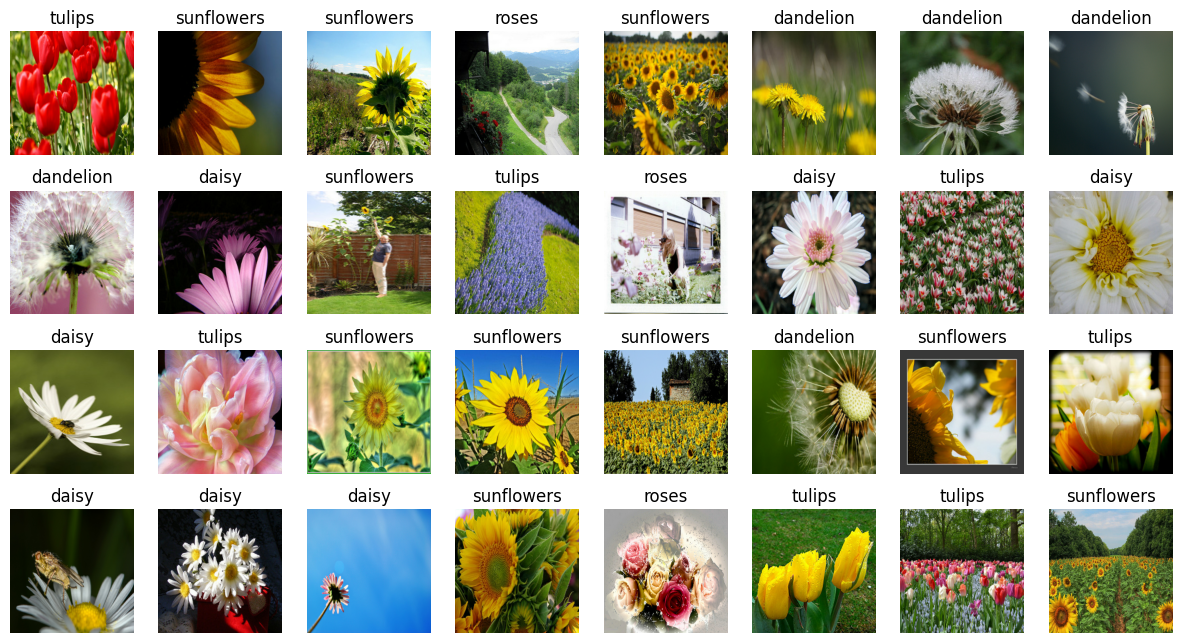

In [3]:
train = raw_train.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))
validation = raw_validation.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))
test = raw_test.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))

utils.example_display(dataset_info, train, num_examples=32, is_raw = False)

## 1.2 모델 설정

/home/technocracy90/keras/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,429 (232.14 KB)

 Trainable params: 59,429 (232.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1737706928.578990  166699 service.cc:148] XLA service 0x7fca900053e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737706928.579053  166699 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-24 17:22:08.596632: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737706928.685392  166699 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-24 17:22:09.159978: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_211', 4 bytes spill stores, 4 bytes spill loads



 5/46 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2452 - loss: 1.5954

I0000 00:00:1737706933.929829  166699 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3159 - loss: 1.5082

2025-01-24 17:22:16.797825: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_450', 72 bytes spill stores, 72 bytes spill loads



46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.3182 - loss: 1.5036 - val_accuracy: 0.4441 - val_loss: 1.2420
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4704 - loss: 1.2367 - val_accuracy: 0.5123 - val_loss: 1.1731
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4917 - loss: 1.1765 - val_accuracy: 0.5068 - val_loss: 1.1633
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4937 - loss: 1.1568 - val_accuracy: 0.5150 - val_loss: 1.1758
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5174 - loss: 1.1342 - val_accuracy: 0.5940 - val_loss: 1.0532
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5446 - loss: 1.0775 - val_accuracy: 0.5967 - val_loss: 1.0535
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5521 - loss: 1.0647 - val_accuracy: 0.6158 - val_loss: 1.0022
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5754 - loss: 1.0385 - val_accuracy: 0.5967 - val

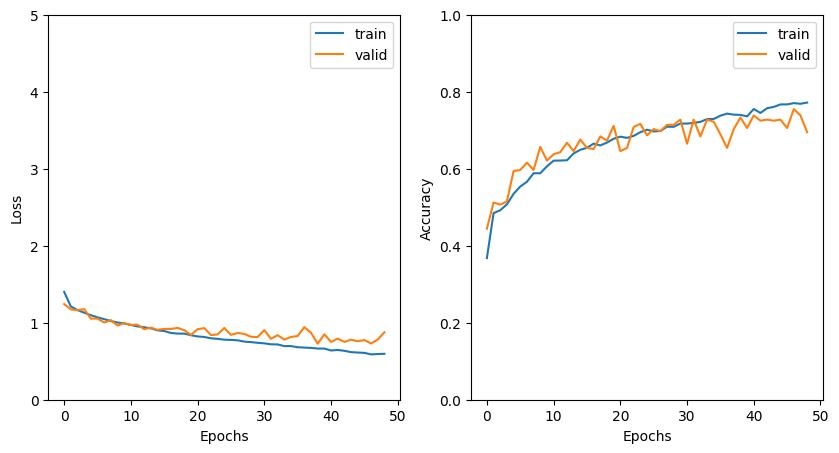

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7347 - loss: 0.7306
Test accuracy: 0.76%, Test loss: 0.68


In [4]:
basic = models_base.simple1()
basic.summary()

basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_batch, val_batch = utils.get_batches(train, validation, batch_size=64)

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

test_loss, test_acc = basic.evaluate(test.batch(64))
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


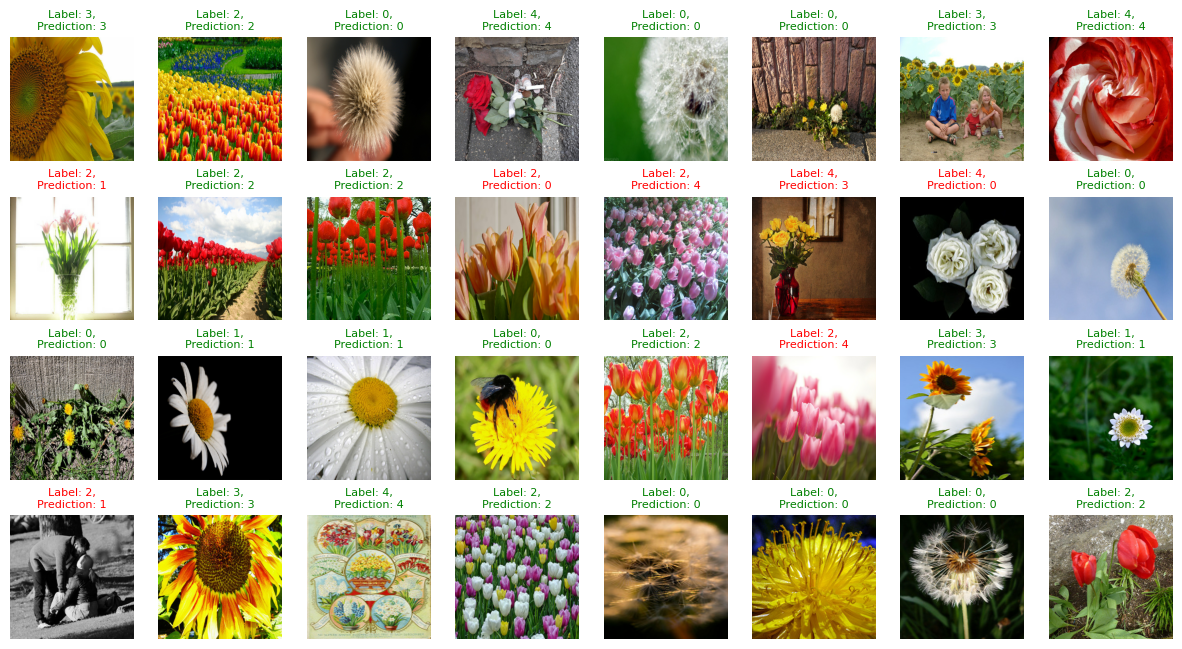

In [5]:
utils.plot_prediction(basic, test)